# AdaBoost Implementation
We are going to implement Adaboost algorithm from scratch.
We will use the heart_disease.csv dataset, which you can see more details about in this <a href="https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download&select=heart.csv"> Link</a>.
___

In [165]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data Prepration
1.   Load Dataset
2.   Separate target feaure
3.   Change class labels to 1 and -1
4.   Do train-test split

In [166]:
#load data
data=pd.read_csv('heart_disease.csv')
#sperate target
X = data.drop(['target'],axis=1)
y = data['target']
#change class labels to 1 and -1

y=y*2-1
y=y.to_numpy()


#do train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=42)


### Adaboost Algorithm Implementation

In [167]:
from sklearn.tree import DecisionTreeClassifier

def calculate_error(y, y_pred, w):
    #TODO : Calculate the weighted error of a weak classifier.

     return (sum(w * (np.not_equal(y, y_pred)).astype(int)))/sum(w)

def calculate_alpha(error):
    #TODO : Calculate the weight of a weak classifier.
    return np.log((1-error)/error)/2

def update_weights(w, alpha, y, y_pred):
    #TODO : Update weights after a boosting iteration.
    return w*np.exp(alpha*(np.not_equal(y,y_pred)).astype(int))

    
class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.training_errors = []

    def fit(self, X, y, M = 100):
        
        self.alphas = [] 
        self.training_errors = []
        self.M = M

        for m in range(0, M):
            
            # Set weights
            if m == 0:
                #TODO
                w=np.ones(len(y))*1/len(y)

                 
            else:
                #TODO
                w=update_weights(w,alpha_m,y,y_pred)
               
            
            # 1. Fit weak classifier and predict labels(using predict method) and Save it to list of weak classifiers.
            #TODO
            #simple tree with max depth 1
            G_m=DecisionTreeClassifier(max_depth=1)
            #fit
            G_m.fit(X,y,w)
            
            y_pred=G_m.predict(X)
            #add weak learner to the list of weak learners
            self.G_M.append(G_m)


            # 2. Calculate error of this weak classifier and save it to list of trainingterrors.
            #TODO
            
            error_m=calculate_error(y,y_pred,w)
            self.training_errors.append(error_m)

            # 3. Calculate alpha of this weak classifier and save it to list of alphas.
            #TODO
            alpha_m=calculate_alpha(error_m)
            self.alphas.append(alpha_m)



    def predict(self, X):

        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds[weak_preds.columns[m]] = y_pred_m

        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred

### Training and Evaluation

In [168]:
#TODO : Fit model
model=AdaBoost()
model.fit(x_train,y_train,200)

#TODO : Predict on test data
y_pred=model.predict(x_test)

#TODO : Print evaluation metrics (Accurcy, Precission, Recall and f-score)
import sklearn.metrics as metrics

accuracy=metrics.accuracy_score(y_test, y_pred)
precission=metrics.precision_score(y_test,y_pred)
recall=metrics.recall_score(y_test,y_pred)
f1=metrics.f1_score(y_test,y_pred)
print(accuracy)
print(precission)
print(recall)
print(f1)




0.8551532033426184
0.8429319371727748
0.8797814207650273
0.8609625668449197


In [169]:
#TODO : Do Scikit-Learn implementation of AdaBoost and print evaluation metrics
from sklearn.ensemble import AdaBoostClassifier
skmodel=AdaBoostClassifier(n_estimators=200,random_state=0)
skmodel.fit(x_train,y_train)
y_pred_sk=skmodel.predict(x_test)
skaccuracy=metrics.accuracy_score(y_test, y_pred_sk)
skprecission=metrics.precision_score(y_test,y_pred_sk)
skrecall=metrics.recall_score(y_test,y_pred_sk)
skf1=metrics.f1_score(y_test,y_pred_sk)
print(skaccuracy)
print(skprecission)
print(skrecall)
print(skf1)


0.8885793871866295
0.8885869565217391
0.8934426229508197
0.8910081743869209


### Early Stopping

<function matplotlib.pyplot.show(close=None, block=None)>

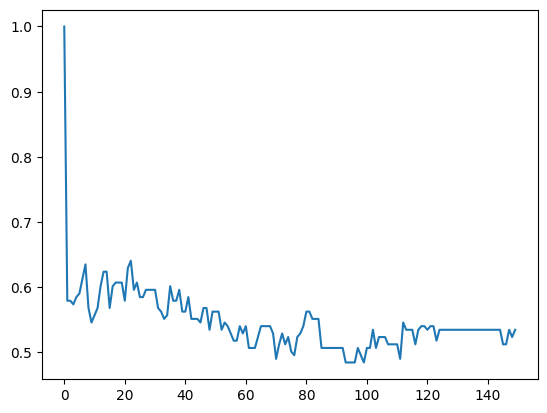

In [170]:
#TODO : Calculate validation error for different number of estimators 
errorVsEstimators={}
for i in range(150):
    #TODO : Fit model
    modelx=AdaBoost()
    modelx.fit(x_train,y_train,i*10)

    #TODO : Predict on test data
    y_pred=modelx.predict(x_test)

    #TODO : Print evaluation metrics (Accurcy, Precission, Recall and f-score)
    mse=metrics.mean_squared_error(y_test,y_pred)
    errorVsEstimators[i]=mse
keys,values=zip(*errorVsEstimators.items())
plt.plot(keys,values)
plt.show

    

In [175]:
#TODO : Plot validation error versus number of estimators figure.
best_n=min(keys)
min_error=min(values)
best_n=keys[values.index(min_error)]
print("min mse: "+str(min_error))
print("best n: "+str(best_n))

min mse: 0.48467966573816157
best n: 93


In [172]:
#TODO : Print the best number for estimators and minimum value for validation error.

### Weighted Error

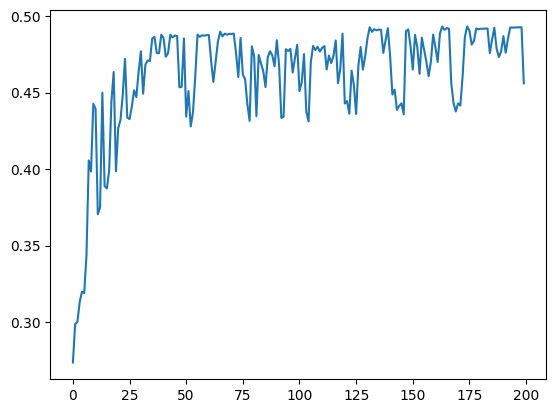

In [179]:
#TODO : Plot weighted training error versus number of estimators figure using training_errors attribute in Adaboost class.
plt.plot(model.training_errors)
plt.show()

### Question : Why does the weighted error tend to increase as the number of estimators increase?